<a href="https://colab.research.google.com/github/mkbahk/AmazonBraket/blob/main/Qiskit_Hello_World_with_EstimatorV2_Primitive_Qiskit_1_2_4_mkbahk_20241013.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Install Qiskit

In [ ]:
!pip install qiskit[visualization]==1.2.4
!pip install qiskit-ibm-runtime==0.30.0

##Quantum Workflow
00_start_qiskit_patterns_diagram.svg

##Step 1. Set up an Quantum Runtime Service channel

In [ ]:
#from qiskit_ibm_runtime import QiskitRuntimeService
#service = QiskitRuntimeService(channel="ibm_quantum", token="56d517b9c8e16472af2d73eb795e32367a186f609dfa83496f7ff9d785df3aa222ca905e09d226505791c6ff53eca4a23114a35682875fa984edaf3fbec4fc06")

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(
    channel="ibm_quantum",
    token="56d517b9c8e16472af2d73eb795e32367a186f609dfa83496f7ff9d785df3aa222ca905e09d226505791c6ff53eca4a23114a35682875fa984edaf3fbec4fc06",
    set_as_default=True,
    # Use `overwrite=True` if you're updating your token.
    overwrite=True,
)

# Load saved credentials
service = QiskitRuntimeService()

In [ ]:
print(service.backends())

[<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_kyiv')>, <IBMBackend('ibm_sherbrooke')>]


In [ ]:
#backend = service.backends()[0]
#backend = service.least_busy(operational=True, simulator=False)
backend = service.backend("ibm_brisbane")

In [ ]:
print(backend)

<IBMBackend('ibm_brisbane')>


## Step 2: Map the problem to a quantum-native format

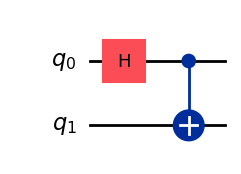

In [ ]:
from qiskit import QuantumCircuit

# Create a new circuit with two qubits
qc = QuantumCircuit(2)

# Add a Hadamard gate to qubit 0
qc.h(0)

# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)

# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.
qc.draw("mpl")

Qiskit-runtime-Service는 이전의 확률분포 반환에서 추가적으로 데이터를 반환하는 두 가지 방법을 제공합니다.
1.   측정하기로 선택한 큐비트 집합에 대한 확률 분포

```
# 회로 실행 및 결과 얻기
job = sampler.run(circuit)
result = job.result()
counts = result.quasi_dists[0]
# 결과 출력
print(counts)
```

2.   관측 가능한 값의 기대값

```
# 회로 실행 및 결과 얻기
job = estimator.run(observable, circuit)
result = job.result()
expectation_value = result.values[0]
# 결과 출력
print(expectation_value)
```
아래는 observable를 이용한 "관측가능한 기대값"을 리턴하는 방법의 예입니다.


In [ ]:
# Set up six different observables.
from qiskit.quantum_info import SparsePauliOp

observables_labels = ["IZ", "IX", "ZI", "XI", "ZZ", "XX"]
observables = [SparsePauliOp(label) for label in observables_labels]

## Step 4: Optimize the circuits and operators

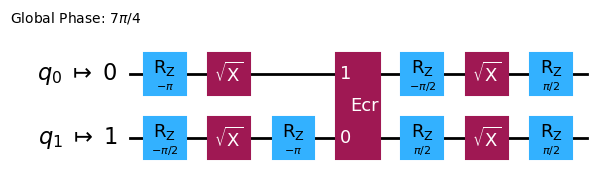

In [ ]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
# Convert to an ISA circuit and layout-mapped observables.
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)

isa_circuit.draw('mpl', idle_wires=False)

## Step 5: Simulator 활용한 이상적인 결과 예측

In [ ]:
from qiskit_ibm_runtime.fake_provider import *

# 모든 fake backend 목록 출력
for backend in FakeProviderForBackendV2().backends():
    print(backend.name) # Changed from backend.name() to backend.name

fake_algiers
fake_almaden
fake_armonk
fake_athens
fake_auckland
fake_belem
fake_boeblingen
fake_bogota
fake_brisbane
fake_brooklyn
fake_burlington
fake_cairo
fake_cambridge
fake_casablanca
fake_cusco
fake_essex
fake_fractional
fake_geneva
fake_guadalupe
fake_hanoi
fake_jakarta
fake_johannesburg
fake_kawasaki
fake_kolkata
fake_kyiv
fake_kyoto
fake_lagos
fake_lima
fake_london
fake_manhattan
fake_manila
fake_melbourne
fake_montreal
fake_mumbai
fake_nairobi
fake_osaka
fake_oslo
fake_ourense
fake_paris
fake_peekskill
fake_perth
fake_prague
fake_poughkeepsie
fake_quebec
fake_quito
fake_rochester
fake_rome
fake_santiago
fake_sherbrooke
fake_singapore
fake_sydney
fake_torino
fake_toronto
fake_valencia
fake_vigo
fake_washington
fake_yorktown


In [ ]:
 # Use the following code instead if you want to run on a simulator:

from qiskit_ibm_runtime.fake_provider import FakeAlmadenV2

#backend = service.backend("ibm_brisbane")
backend = FakeAlmadenV2()
estimator = Estimator(backend)

# Convert to an ISA circuit and layout-mapped observables.

pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)
mapped_observables = [
    observable.apply_layout(isa_circuit.layout) for observable in observables
]

job = estimator.run([(isa_circuit, mapped_observables)])
result = job.result()

# This is the result of the entire submission.  You submitted one Pub,
# so this contains one inner result (and some metadata of its own).

job_result = job.result()

# This is the result from our single pub, which had five observables,
# so contains information on all five.

pub_result = job.result()[0]

/usr/local/lib/python3.10/dist-packages/qiskit_ibm_runtime/fake_provider/fake_backend.py:468: RuntimeWarning: Aer not found, using qiskit.BasicSimulator and no noise.
  warnings.warn(


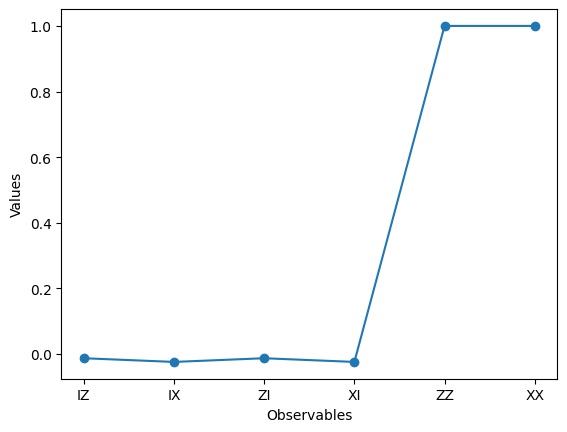

In [ ]:
# Plot the result
from matplotlib import pyplot as plt

values = pub_result.data.evs

errors = pub_result.data.stds

# plotting graph
plt.plot(observables_labels, values, '-o')
plt.xlabel('Observables')
plt.ylabel('Values')
plt.show()

## Step 6: Execute using the real QPU primitives

In [ ]:
# Construct the Estimator instance.
from qiskit_ibm_runtime import EstimatorV2 as Estimator
backend = service.backend("ibm_brisbane")
#backend = FakeAlmadenV2()


estimator = Estimator(mode=backend)
estimator.options.resilience_level = 1
estimator.options.default_shots = 100

mapped_observables = [
    observable.apply_layout(isa_circuit.layout) for observable in observables
]

# One pub, with one circuit to run against five different observables.
job = estimator.run([(isa_circuit, mapped_observables)])

# Use the job ID to retrieve your job data later
print(f">>> Job ID: {job.job_id()}")

>>> Job ID: 6225610f-2886-4d08-95c7-19024170a053


/usr/local/lib/python3.10/dist-packages/qiskit_ibm_runtime/fake_provider/local_service.py:187: UserWarning: The resilience_level option has no effect in local testing mode.
  warnings.warn("The resilience_level option has no effect in local testing mode.")
/usr/local/lib/python3.10/dist-packages/qiskit_ibm_runtime/fake_provider/fake_backend.py:468: RuntimeWarning: Aer not found, using qiskit.BasicSimulator and no noise.
  warnings.warn(


# Async 방식으로 QPU를 제공하는 Cloud Platform에서 Job State가 완료된 것을 확인한 후 아래의 코드를 기동합니다.

In [ ]:
# This is the result of the entire submission.  You submitted one Pub,
# so this contains one inner result (and some metadata of its own).
job_result = job.result()

# This is the result from our single pub, which had six observables,
# so contains information on all six.
pub_result = job.result()[0]

## Step 7: Post-Processing

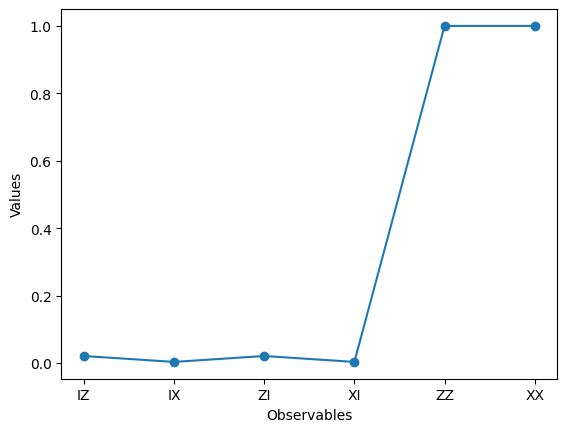

In [ ]:
# Plot the result

from matplotlib import pyplot as plt

values = pub_result.data.evs

errors = pub_result.data.stds

# plotting graph
plt.plot(observables_labels, values, '-o')
plt.xlabel('Observables')
plt.ylabel('Values')
plt.show()